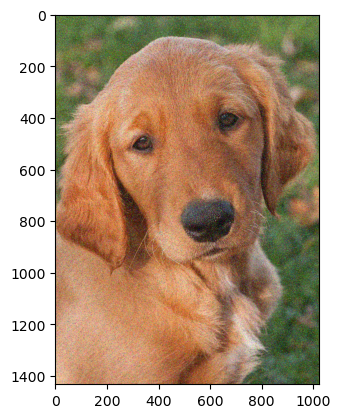

In [48]:
import numpy as np
from skimage import io
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio
from matplotlib import pyplot as plt
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

img = io.imread ("/Users/jiyoung/Desktop/univ/'23-2/Engineering Design/workspace/dog.jpeg")
img = img/255.0
image = img

from skimage.util import random_noise
# Step 1: Add salt and pepper noise
salt_pepper_image = random_noise(img, mode='s&p', amount=0.1)
#plt.imsave('salt_pepper_image.png', salt_pepper_image)

# Step 2: Add additive white Gaussian noise
mean = 0
var = 0.01
std = np.sqrt(var)
gaussian_noise = np.random.normal(mean, std, salt_pepper_image.shape)
noisy_image = salt_pepper_image + gaussian_noise

# Clip the pixel values to be in the [0, 1] range
noisy_image = np.clip(noisy_image, 0., 1.0)
#plt.imsave('noisy_image.png', noisy_image)
plt.imshow(noisy_image)

In [49]:
print("**원본 이미지, 원본 psnr 비교**")
print("PSNR :", peak_signal_noise_ratio(img, image))

print("**원본 이미지, s&p image psnr 비교**")
print("PSNR :", peak_signal_noise_ratio(img, salt_pepper_image))
          
print("**원본 이미지, s&p noise image + WG noise image 비교**")
print("PSNR :", peak_signal_noise_ratio(img, noisy_image))

**원본 이미지, 원본 psnr 비교**
PSNR : inf
**원본 이미지, s&p image psnr 비교**
PSNR : 15.274453984388165
**원본 이미지, s&p noise image + WG noise image 비교**
PSNR : 14.57203097390751


In [44]:
# def median_filter(noisy_image, filter_size=(3,3), stride=1):

#     img_shape = np.shape(noisy_image)
#     img_row = img_shape[0]
#     img_col = img_shape[1]

#     result_shape = ((img_row - filter_size[0])//stride + 1, (img_col - filter_size[1])//stride + 1)

#     result = np.zeros(result_shape)

#     for row in range(result_shape[0]):
#         for col in range(result_shape[1]):
#             result[row, col] = np.median(noisy_image[row*stride:row*stride+filter_size[0], col*stride:col*stride+filter_size[1]])

#     return result

# median_image = median_filter(noisy_image, filter_size=(3,3), stride=1)
# plt.imshow(median_image)


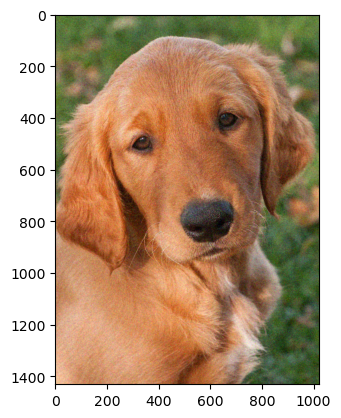

In [52]:
def median_filter(img, filter_size=(3, 3), stride=3):
    img_shape = np.shape(img)
    result_shape = tuple(np.int64((np.array(img_shape[:2]) - np.array(filter_size)) / stride) + 1) + (img_shape[2],)
    result = np.zeros(result_shape)

    for h in range(0, result_shape[0], stride):
        for w in range(0, result_shape[1], stride):
            for c in range(img_shape[2]):
                tmp = img[h:h + filter_size[0], w:w + filter_size[1], c].ravel()
                tmp = np.sort(tmp)
                result[h, w, c] = tmp[int(len(tmp) / 2)]

    return result

# Apply median filter to color image
median_image = median_filter(noisy_image, filter_size=(3, 3), stride=1)
plt.imshow(median_image)


In [54]:
#Gaussian Filter

def gaussian_kernel(k_size, sigma):
    size = k_size//2
    y, x = np.ogrid[-size:size+1, -size:size+1]
    filter = 1/(2*np.pi * (sigma**2)) * np.exp(-1 *(x**2 + y**2) /(2*(sigma**2)))
    sum = filter.sum()
    filter /= sum
    return filter

def padding(img, k_size):
    pad_size = k_size//2
    rows, cols, ch = img.shape
    
    res = np.zeros((rows + (2*pad_size), cols+(2*pad_size), ch), dtype=np.float)
    
    if pad_size == 0:
        res = img.copy()
    else:
        res[pad_size:-pad_size, pad_size:-pad_size] = img.copy()
    return res

def gaussian_filtering(img, k_size=3,sigma=1):
    rows, cols, channels = img.shape
    filter = gaussian_kernel(k_size, sigma)
    pad_img = padding(img,k_size)
    filtered_img = np.zeros((rows, cols, channels), dtype=np.float32)
    
    for ch in range(0, channels):
        for i in range(rows):
            for j in range(cols):
                filtered_img[i, j, ch] = np.sum(filter * pad_img[i:i+k_size, j:j+k_size, ch])

    return filtered_img

from skimage.metrics import peak_signal_noise_ratio, structural_similarity

plt.figure(figsize=(12,12))
row = 3
col = 3

for i in range(0, 3):
    for j in range(0,3):
        plt.subplot(3, 3, 1+ i*3 + j)
        k_size = 3+2*i
        sigma = 3*j + 1
        res = gaussian_filtering(noisy_image, k_size = k_size, sigma = sigma)
        title = "k size : " + str(k_size) + ",  sigma = " + str(sigma)
        plt.title(title)
        plt.imshow(res)
        print("PSNR :", peak_signal_noise_ratio(img, res))

/var/folders/n1/t3hm6b612gg69mlfjrdv4ht00000gn/T/ipykernel_66956/1991321612.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  res = np.zeros((rows + (2*pad_size), cols+(2*pad_size), ch), dtype=np.float)
/var/folders/n1/t3hm6b612gg69mlfjrdv4ht00000gn/T/ipykernel_66956/1991321612.py:51: UserWarning: Inputs have mismatched dtype.  Setting data_range based on image_true.
  print("PSNR :", peak_signal_noise_ratio(img, res))


PSNR : 22.564538942784456
PSNR : 22.801081310081294
PSNR : 22.795037308181527
PSNR : 23.720748796853282
PSNR : 24.698871848184577
PSNR : 24.668482711321637
PSNR : 23.811250545683812


In [53]:
from skimage.transform import resize
from skimage.metrics import peak_signal_noise_ratio

# Ensure noisy_image and median_image are in the correct range (0, 1)
noisy_image = np.clip(noisy_image, 0., 1.)

# Resize img to the size of median_image
img_resized = resize(img, median_image.shape[:2], mode='constant', anti_aliasing=True)

# Calculate PSNR
psnr_value = peak_signal_noise_ratio(img_resized, median_image)

# Print PSNR
print("**원본 이미지, median filter 적용 사진 비교**")
print("PSNR:", psnr_value)


**원본 이미지, median filter 적용 사진 비교**
PSNR: 25.568210484233106
